# Imports

In [1]:
from dv import AedatFile
import pandas as pd
import numpy as np
from Utilities import *
import os
from time import time

# Constants

In [2]:
DATA_PATH = './GestureData/'
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
SPLIT_DELTA_T = 40000
NUM_FRAMES = 25

# Load Functions

In [3]:
def loadAEDAT(path):
    with AedatFile(path) as f:
        events = np.hstack([packet for packet in f['events'].numpy()])
    timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']
    timestamps = timestamps - timestamps.min()
    return (timestamps,x,y,polarities)
def splitVideos(initialTimes,endTimes,timestamps,x,y,polarities):
    videoTensor = np.zeros((len(initialTimes),IMAGE_HEIGHT,IMAGE_WIDTH,NUM_FRAMES))
    video = 0
    for index in range(len(timestamps)):
        if ((timestamps[index] >= initialTimes[video]) 
        and (timestamps[index] < (NUM_FRAMES * SPLIT_DELTA_T + initialTimes[video]))):
            frame = np.floor((timestamps[index] - initialTimes[video]) / SPLIT_DELTA_T).astype(int)
            videoTensor[video,y[index],x[index],frame] += polarities[index] * 2 - 1
        elif(timestamps[index] >= endTimes[video]):
            if(video + 1 < len(initialTimes)):
                video += 1
            else:
                break
    return videoTensor

# Load Data

In [4]:
time_start = time()
files = pd.read_csv(DATA_PATH + 'files.csv')
labels = np.zeros((0))
videos = []
for index, row in files.iterrows():
    labelData = pd.read_csv(DATA_PATH + row[1])
    labels = np.append(labels,labelData['class'].values)
    (ts,x,y,p) = loadAEDAT(DATA_PATH + row[0])
    fileVideos = splitVideos(labelData['startTime_usec'].values,labelData['endTime_usec'],ts,x,y,p)
    for x in range(len(labelData['class'].values)):
        videos.append(fileVideos[x,:,:,:])
videos = np.array(videos)
time_stop = time()
print('Elapsed Time:',round(time_stop-time_start,3),'(sec)')

Elapsed Time: 7602.269 (sec)


In [5]:
vid2 = np.zeros((25,128,128))
for x in range(128):
    for y in range(128):
        for t in range(25):
            vid2[t,y,x] = videos[60,y,x,t]

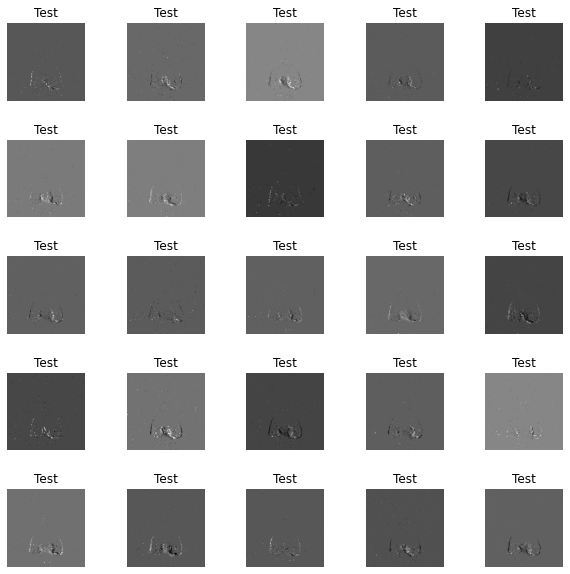

In [6]:
PlotImages(0,25,5,5,vid2,np.zeros((25)).astype(int),['Test'],color=False)